In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [29]:
import warnings

# Suppress all warnings
warnings.simplefilter(action='ignore', category=Warning)

In [30]:
# Set the working directory
os.chdir(r"D:\Benson\aUpWork\Douglas Backtester Algo\Backtester Algorithm\Data")

In [31]:
# Function to view all rows and columns
def view_all():
    pd.set_option('display.max_rows', None)  # Show all rows
    pd.set_option('display.max_columns', None)  # Show all columns
    print("Display set to show all rows and columns.")

# Function to reset display options to default
def reset_display():
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    print("Display options reset to default.")

# Example Usage
view_all()  # Set to view all rows and columns
reset_display()  # Reset to default display settings


Display set to show all rows and columns.
Display options reset to default.


In [32]:
# Load the excel data file
file_path = r"YMAG ETF Price & Dividends.xlsx"
YMAG = pd.read_excel(file_path)

# Convert 'Date' column to datetime
YMAG["Date"] = pd.to_datetime(YMAG["Date"])

# Drop unnecessary columns
YMAG = YMAG.drop(columns=['Vol.', 'Change %'])

# Display the first few rows
YMAG

,Date,Price,Open,High,Low
0,2025-01-28,18.81,18.48,18.83,18.35
1,2025-01-27,18.39,18.27,18.53,18.18
2,2025-01-24,18.93,19.00,19.07,18.83
3,2025-01-23,0.19,NaN,NaN,NaN
4,2025-01-23,18.94,18.94,18.97,18.85
...,...,...,...,...,...
269,2024-02-06,20.20,20.16,20.28,20.05
270,2024-02-05,20.19,20.34,20.34,19.95
271,2024-02-02,20.30,20.18,20.32,19.99
272,2024-02-01,19.75,19.68,19.76,19.60


In [33]:
# check for missing values in YMAX
YMAG.isnull().sum()

Date      0
Price     0
Open     25
High     25
Low      25
dtype: int64

In [34]:
# Load the Excel data file
file_path = r"YMAX ETF Price & Dividends.xlsx"
YMAX = pd.read_excel(file_path)

# Convert 'Date' column to datetime
YMAX["Date"] = pd.to_datetime(YMAX["Date"])

# Drop unnecessary columns
YMAX = YMAX.drop(columns=['Vol.', 'Change %'])

# Display the first few rows
YMAX

,Date,Price,Open,High,Low
0,2025-01-28,16.72,16.57,16.73,16.33
1,2025-01-27,16.40,16.44,16.62,16.23
2,2025-01-24,16.89,17.00,17.08,16.86
3,2025-01-23,0.17,NaN,NaN,NaN
4,2025-01-23,16.96,16.80,16.97,16.77
...,...,...,...,...,...
279,2024-01-24,20.36,20.51,20.53,20.35
280,2024-01-23,20.27,20.21,20.28,20.17
281,2024-01-22,20.18,20.13,20.31,20.11
282,2024-01-19,20.12,20.03,20.12,19.88


In [35]:
# Check for missing values in YMAX
YMAX.isnull().sum()

Date      0
Price     0
Open     26
High     26
Low      26
dtype: int64

In [36]:
#Extracting the Dividends data
# Create a new DataFrame with only rows where 'Open' is NaN
YMAX_Dividends = YMAX[YMAX['Open'].isna()].copy()

# Drop unnecessary columns
YMAX_Dividends = YMAX_Dividends.drop(columns=['Open', 'High', 'Low'])

# Rename 'Price' column to 'Dividends'
YMAX_Dividends = YMAX_Dividends.rename(columns={'Price': 'YMAX Dividends'})

# Display the new DataFrame
YMAX_Dividends


,Date,YMAX Dividends
3,2025-01-23,0.17
8,2025-01-16,0.11
14,2025-01-08,0.14
18,2025-01-03,0.18
23,2024-12-27,0.25
29,2024-12-19,0.14
35,2024-12-12,0.12
41,2024-12-05,0.24
46,2024-11-29,0.31
52,2024-11-21,0.24


In [37]:
#Extracting the Dividends data
# Create a new DataFrame with only rows where 'Open' is NaN
YMAG_Dividends = YMAG[YMAG['Open'].isna()].copy()

# Drop unnecessary columns
YMAG_Dividends = YMAG_Dividends.drop(columns=['Open', 'High', 'Low'])

# Rename 'Price' column to 'Dividends'
YMAG_Dividends = YMAG_Dividends.rename(columns={'Price': 'YMAG Dividends'})

# Display the new DataFrame
YMAG_Dividends


,Date,YMAG Dividends
3,2025-01-23,0.19
8,2025-01-16,0.05
14,2025-01-08,0.16
18,2025-01-03,0.31
23,2024-12-27,0.17
29,2024-12-19,0.06
40,2024-12-05,0.28
45,2024-11-29,0.20
51,2024-11-21,0.06
57,2024-11-14,0.21


In [38]:
#check for missing values in YMAG_Dividends
YMAG_Dividends.isnull().sum()

Date              0
YMAG Dividends    0
dtype: int64

In [39]:
# Drop all rows with NaN values in YMAX and YMAG, to remove the duplicate rows where dividends were
YMAX = YMAX.dropna()
YMAG = YMAG.dropna()

# Merge dividends with YMAX price data
YMAX = YMAX.merge(YMAX_Dividends, on="Date", how="left")
YMAX["YMAX Dividends"].fillna(0, inplace=True)  # Fill missing dividends with 0

# Merge dividends with YMAG price data
YMAG = YMAG.merge(YMAG_Dividends, on="Date", how="left")
YMAG["YMAG Dividends"].fillna(0, inplace=True)  # Fill missing dividends with 0

# Display merged data
print(YMAX.head())
print(YMAG.head())


        Date  Price   Open   High    Low  YMAX Dividends
0 2025-01-28  16.72  16.57  16.73  16.33            0.00
1 2025-01-27  16.40  16.44  16.62  16.23            0.00
2 2025-01-24  16.89  17.00  17.08  16.86            0.00
3 2025-01-23  16.96  16.80  16.97  16.77            0.17
4 2025-01-22  17.03  17.04  17.09  16.97            0.00
        Date  Price   Open   High    Low  YMAG Dividends
0 2025-01-28  18.81  18.48  18.83  18.35            0.00
1 2025-01-27  18.39  18.27  18.53  18.18            0.00
2 2025-01-24  18.93  19.00  19.07  18.83            0.00
3 2025-01-23  18.94  18.94  18.97  18.85            0.19
4 2025-01-22  19.06  18.94  19.09  18.90            0.00


In [40]:
# check and print sum of missing values in YMAX
print(YMAX.isnull().sum())

# check and print sum of missing values in YMAG
print(YMAG.isnull().sum())

Date              0
Price             0
Open              0
High              0
Low               0
YMAX Dividends    0
dtype: int64
Date              0
Price             0
Open              0
High              0
Low               0
YMAG Dividends    0
dtype: int64


In [41]:
# Merge dividends with YMAX price data
Divs = YMAX[["Date", "YMAX Dividends"]].merge(YMAG[["Date", "YMAG Dividends"]], on="Date", how="left")

#check and print the sum of missing values
print(Divs.isna().sum())

# Fill missing values with 0
Divs.fillna(0, inplace=True)
print("sum of missing values after filling with 0")
print(Divs.isna().sum())

# Display the first few rows
Divs

Date              0
YMAX Dividends    0
YMAG Dividends    9
dtype: int64
sum of missing values after filling with 0
Date              0
YMAX Dividends    0
YMAG Dividends    0
dtype: int64


,Date,YMAX Dividends,YMAG Dividends
0,2025-01-28,0.00,0.00
1,2025-01-27,0.00,0.00
2,2025-01-24,0.00,0.00
3,2025-01-23,0.17,0.19
4,2025-01-22,0.00,0.00
...,...,...,...
253,2024-01-24,0.00,0.00
254,2024-01-23,0.00,0.00
255,2024-01-22,0.00,0.00
256,2024-01-19,0.00,0.00


In [42]:
# Load the CSV file with all assets prices
file_path = 'All assets Prices.csv'
data = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Merge the data with Divs on 'Date'
All_Assets = data.merge(Divs, on='Date', how='left')

# Sort the DataFrame by 'Date' in descending order
All_Assets = All_Assets.sort_values(by='Date', ascending=True)

# Set 'Date' as the index
All_Assets.set_index('Date', inplace=True)

# Print the sum of missing values in each column
print("The sum of missing values in each column:")
print(All_Assets.isnull().sum())

# print rhe info of the merged DataFrame
All_Assets.info()

# Display the first few rows of the merged DataFrame
All_Assets.head()


The sum of missing values in each column:
YMAX              0
YMAG              0
VIX               0
VVIX              0
QQQ               0
YMAX Dividends    0
YMAG Dividends    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-01-31 to 2025-01-28
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YMAX            249 non-null    float64
 1   YMAG            249 non-null    float64
 2   VIX             249 non-null    float64
 3   VVIX            249 non-null    float64
 4   QQQ             249 non-null    float64
 5   YMAX Dividends  249 non-null    float64
 6   YMAG Dividends  249 non-null    float64
dtypes: float64(7)
memory usage: 15.6 KB


,YMAX,YMAG,VIX,VVIX,QQQ,YMAX Dividends,YMAG Dividends
Date,,,,,,,
2024-01-31,20.20,19.49,14.35,87.559998,414.506744,0.0,0.0
2024-02-01,20.39,19.75,13.88,84.830002,419.387726,0.0,0.0
2024-02-02,20.70,20.30,13.85,83.309998,426.475586,0.0,0.0
2024-02-05,20.44,20.19,13.67,79.580002,425.918915,0.0,0.0
2024-02-06,20.61,20.20,13.06,76.970001,425.063995,0.0,0.0


In [ ]:
# Define rolling window size (e.g., 14 days)
window_size = 14

# Compute daily returns for each asset in All_Assets, excluding dividends columns
returns = All_Assets.loc[:, ~All_Assets.columns.str.contains('Dividends')].pct_change().dropna()

# Initialize stats_df with rolling volatilities
Prices_and_stats_df = pd.DataFrame(index=returns.index)

# Compute rolling correlations
Prices_and_stats_df["YMAX-VIX Correlation"] = returns["YMAX"].rolling(window=window_size).corr(returns["VIX"])
Prices_and_stats_df["YMAX-VVIX Correlation"] = returns["YMAX"].rolling(window=window_size).corr(returns["VVIX"])
Prices_and_stats_df["YMAG-VIX Correlation"] = returns["YMAG"].rolling(window=window_size).corr(returns["VIX"])
Prices_and_stats_df["YMAG-VVIX Correlation"] = returns["YMAG"].rolling(window=window_size).corr(returns["VVIX"])

#Merge the prices and stats data
Prices_and_stats_df = All_Assets.merge(Prices_and_stats_df, left_index=True, right_index=True)

# Drop NaN values resulting from rolling calculations
Prices_and_stats_df = Prices_and_stats_df.dropna()

# Rest the prices and stats data index
Prices_and_stats_df.reset_index(inplace=True)

# Display the first and last few rows of Prices_and_stats_df
Prices_and_stats_df

,Date,YMAX,YMAG,VIX,VVIX,QQQ,YMAX Dividends,YMAG Dividends,YMAX-VIX Correlation,YMAX-VVIX Correlation,YMAG-VIX Correlation,YMAG-VVIX Correlation
0,2024-02-07,20.78,20.47,12.83,80.540001,429.438019,0.00,0.00,-0.089645,0.368367,0.472342,0.389138
1,2024-02-08,20.80,20.49,12.79,83.070000,430.233307,0.00,0.00,-0.088251,0.295092,0.381620,0.238293
2,2024-02-09,20.78,20.62,12.93,81.940002,434.468079,0.00,0.00,-0.443723,0.531103,0.158006,0.738472
3,2024-02-12,20.93,20.52,13.93,84.629997,432.768219,0.00,0.00,-0.100292,0.140397,-0.509916,0.190361
4,2024-02-13,20.57,20.23,15.85,93.190002,426.018280,0.00,0.00,-0.713820,-0.599554,-0.934592,-0.630507
...,...,...,...,...,...,...,...,...,...,...,...,...
239,2025-01-22,17.03,19.06,15.10,100.559998,531.510010,0.00,0.00,-0.823659,-0.592349,-0.848787,-0.657200
240,2025-01-23,16.96,18.94,15.02,99.519997,532.640015,0.17,0.19,-0.696314,0.046230,-0.711100,-0.045070
241,2025-01-24,16.89,18.93,14.85,100.410004,529.630005,0.00,0.00,-0.441019,0.308047,-0.406384,0.359605
242,2025-01-27,16.40,18.39,17.90,110.309998,514.210022,0.00,0.00,-0.918570,-0.825533,-0.920279,-0.805551


## BACKTESTING THE INVESTMENT RULES

### Investment Rules:
1. **Rule 1**: If VIX < 20 and VVIX < 100 → Long YMAX/YMAG (no hedge).
2. **Rule 2**: If VIX ≥ 20 or VVIX ≥ 100 → Long YMAX/YMAG and short an equal dollar amount of QQQ.
3. **Rule 3**: If VIX ≥ 20 or VVIX ≥ 100 and correlation of YMAX/YMAG with VIX/VVIX < -0.3 → No investment.

#### YMAX BACKTEST

In [44]:
# Create a separate dataframe for YMAX backtesting
ymax_df = Prices_and_stats_df.copy()

# Define initial portfolio value
initial_investment = 10000  # $10,000 starting capital

# Function to determine strategy for YMAX only
def determine_strategy_ymax(row):
    if row["VIX"] < 20 and row["VVIX"] < 100:
        return "Long YMAX (No Hedge)"
    elif row["VIX"] >= 20 or row["VVIX"] >= 100:
        if row["YMAX-VIX Correlation"] < -0.3 or row["YMAX-VVIX Correlation"] < -0.3:
            return "No Investment"
        return "Long YMAX + Short QQQ"
    return "No Investment"

# Apply the strategy to YMAX data
ymax_df["Strategy"] = ymax_df.apply(determine_strategy_ymax, axis=1)

# Initialize tracking columns
ymax_df["Portfolio_Value"] = initial_investment

# Initialize a column to track QQQ shorted shares
ymax_df["QQQ_Shares_Short"] = 0


# Iterate over rows to simulate performance
for i in range(1, len(ymax_df)):
    prev_value = ymax_df.loc[i-1, "Portfolio_Value"]
    strategy = ymax_df.loc[i, "Strategy"]
    
    if strategy == "Long YMAX (No Hedge)":
        # Calculate the number of shares held
        shares_held = prev_value / ymax_df.loc[i-1, "YMAX"]

        # Get today's price and dividends per share
        today_price = ymax_df.loc[i, "YMAX"]
        today_dividend = ymax_df.loc[i, "YMAX Dividends"]

        # Compute new portfolio value
        ymax_df.loc[i, "Portfolio_Value"] = shares_held * (today_price + today_dividend)

    elif strategy == "Long YMAX + Short QQQ":
        # Calculate the number of YMAX shares held
        shares_held = prev_value / ymax_df.loc[i-1, "YMAX"]

        # Get today's price and dividends per share
        today_price = ymax_df.loc[i, "YMAX"]
        today_dividend = ymax_df.loc[i, "YMAX Dividends"]

        # Handle QQQ Hedge
        if ymax_df.loc[i-1, "Strategy"] != "Long YMAX + Short QQQ":
            # First time hedge is applied → Short QQQ
            ymax_df.loc[i, "QQQ_Shares_Short"] = prev_value / ymax_df.loc[i-1, "QQQ"]
        else:
            # Continue holding the short position
            ymax_df.loc[i, "QQQ_Shares_Short"] = ymax_df.loc[i-1, "QQQ_Shares_Short"]

        # Compute hedge loss
        hedge_loss = ymax_df.loc[i, "QQQ_Shares_Short"] * (ymax_df.loc[i, "QQQ"] - ymax_df.loc[i-1, "QQQ"])

        # Store hedge loss
        ymax_df.loc[i, "QQQ_Short_Loss"] = hedge_loss

        # Compute new portfolio value
        ymax_df.loc[i, "Portfolio_Value"] = (shares_held * (today_price + today_dividend)) - hedge_loss

    elif strategy == "No Investment":
        ymax_df.loc[i, "Portfolio_Value"] = prev_value  # Stay in cash



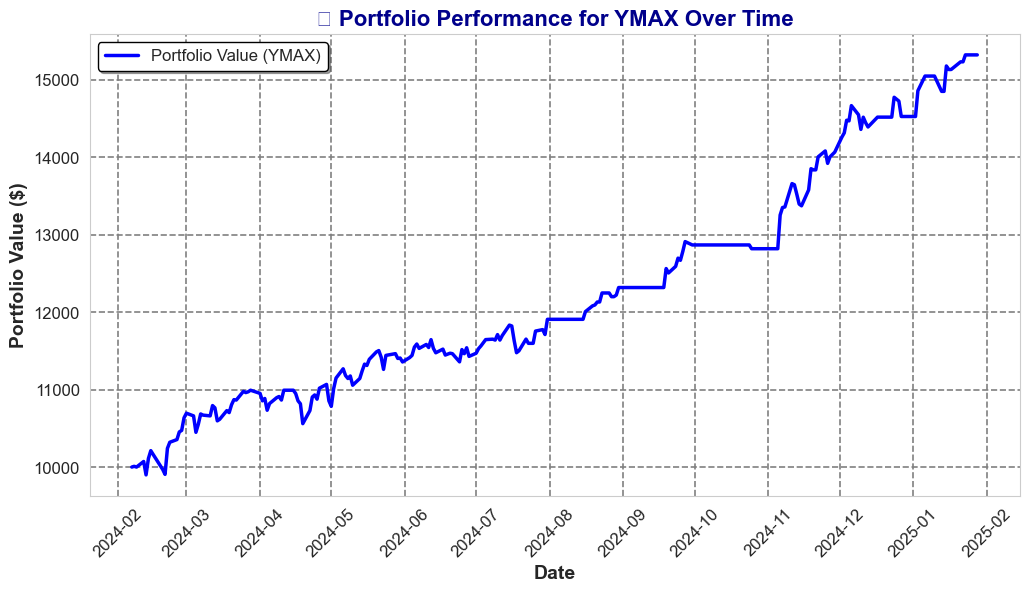

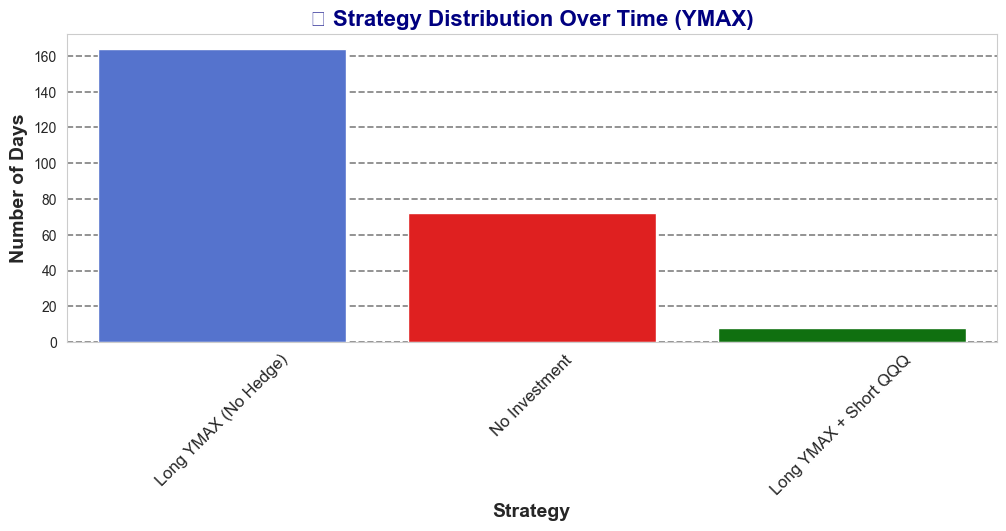

In [45]:
# Set Seaborn style for a clean aesthetic
sns.set_style("whitegrid")

# 1️⃣ **Plot Portfolio Performance for YMAX**
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=ymax_df["Date"], y=ymax_df["Portfolio_Value"], color="blue", linewidth=2.5, label="Portfolio Value (YMAX)")

# Format X-axis to display months
ax.xaxis.set_major_locator(mdates.MonthLocator())  
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  

# Improve labels and title
plt.xlabel("Date", fontsize=14, fontweight="bold")
plt.ylabel("Portfolio Value ($)", fontsize=14, fontweight="bold")
plt.title("📈 Portfolio Performance for YMAX Over Time", fontsize=16, fontweight="bold", color="darkblue")

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add THICKER grid lines with color
plt.grid(True, linestyle="--", linewidth=1.2, color="gray")

# Add legend with improved styling
plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=True, edgecolor="black")

# Show plot
plt.show()

# 2️⃣ **Plot Strategy Usage Over Time for YMAX**
plt.figure(figsize=(12, 4))
ax = sns.barplot(x=ymax_df["Strategy"].value_counts().index, y=ymax_df["Strategy"].value_counts().values, palette=["royalblue", "red", "green"])

# Improve labels and title
plt.xlabel("Strategy", fontsize=14, fontweight="bold")
plt.ylabel("Number of Days", fontsize=14, fontweight="bold")
plt.title("📊 Strategy Distribution Over Time (YMAX)", fontsize=16, fontweight="bold", color="navy")

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add THICKER grid lines with color
plt.grid(axis="y", linestyle="--", linewidth=1.2, color="gray")

# Show plot
plt.show()


##### PERFORMANCE MEASURES OF THE STRATEGY ON YMAX

In [46]:
import numpy as np
import pandas as pd

# Compute daily returns from portfolio value for YMAX
ymax_df["Portfolio_Return"] = ymax_df["Portfolio_Value"].pct_change()

# 1️⃣ **Compute Key Performance Metrics for YMAX**
performance_metrics_ymax = {}

# **Total Return (%)**
performance_metrics_ymax["Total Return (%)"] = (ymax_df["Portfolio_Value"].iloc[-1] / ymax_df["Portfolio_Value"].iloc[0] - 1) * 100

# **CAGR (Compounded Annual Growth Rate)**
num_days = (ymax_df["Date"].iloc[-1] - ymax_df["Date"].iloc[0]).days
years = num_days / 365
performance_metrics_ymax["CAGR (%)"] = ((ymax_df["Portfolio_Value"].iloc[-1] / ymax_df["Portfolio_Value"].iloc[0]) ** (1 / years) - 1) * 100

# **Annualized Volatility (%)**
performance_metrics_ymax["Annualized Volatility (%)"] = ymax_df["Portfolio_Return"].std() * np.sqrt(252) * 100

# **Sharpe Ratio** (assuming risk-free rate = 2%)
risk_free_rate = 0.02
sharpe_ratio_ymax = (performance_metrics_ymax["CAGR (%)"] / 100 - risk_free_rate) / (performance_metrics_ymax["Annualized Volatility (%)"] / 100)
performance_metrics_ymax["Sharpe Ratio"] = sharpe_ratio_ymax

# **Max Drawdown (%) - Corrected**
rolling_max_ymax = ymax_df["Portfolio_Value"].cummax()
drawdown_ymax = (ymax_df["Portfolio_Value"] / rolling_max_ymax) - 1  # This gives drawdowns as decimals

# Convert drawdowns to percentage for display
drawdown_ymax_percentage = drawdown_ymax * 100

# Correct max drawdown calculation
performance_metrics_ymax["Max Drawdown (%)"] = drawdown_ymax_percentage.min()  # Already in percentage

# **Calmar Ratio** (CAGR / Absolute Max Drawdown)
max_drawdown_abs_ymax = abs(performance_metrics_ymax["Max Drawdown (%)"])
performance_metrics_ymax["Calmar Ratio"] = performance_metrics_ymax["CAGR (%)"] / max_drawdown_abs_ymax if max_drawdown_abs_ymax != 0 else np.nan

# Convert performance metrics to DataFrame
performance_df = pd.DataFrame(performance_metrics_ymax, index=["YMAX Strategy"])

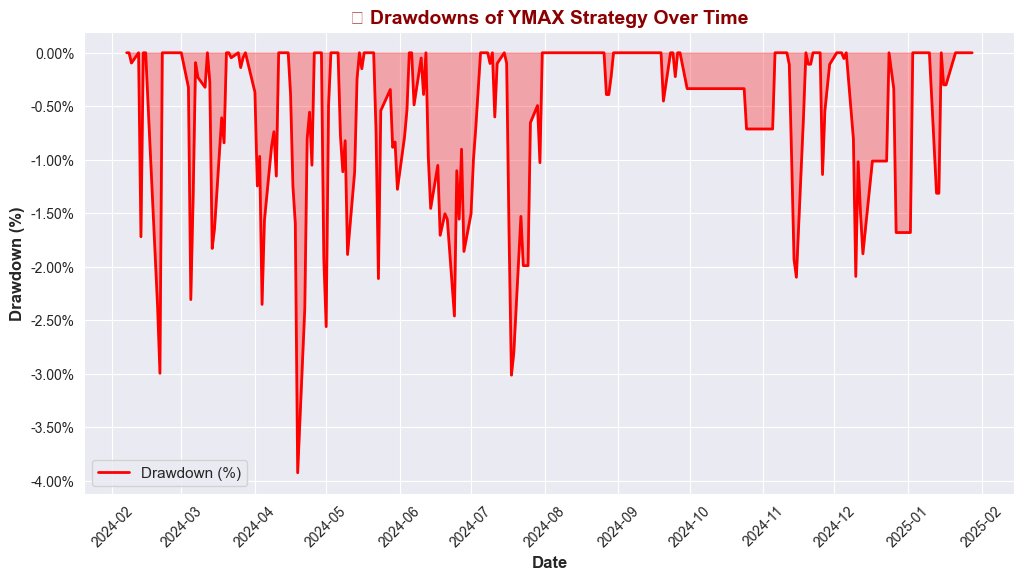

In [47]:

# 2️⃣ **Plot Portfolio Drawdowns for YMAX - Fixed to Show % Drawdowns**
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

# Plot Drawdowns with improved styling
ax = sns.lineplot(x=ymax_df["Date"], y=drawdown_ymax_percentage, color="red", linewidth=2, label="Drawdown (%)")

# Fill area under the drawdown curve for better visualization
plt.fill_between(ymax_df["Date"], drawdown_ymax_percentage, color="red", alpha=0.3)

# Format Y-axis labels as percentages
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.2f}%"))

# Format X-axis labels to show **one tick per month**
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show ticks at the start of every month
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Format as YYYY-MM (e.g., 2024-03)

# Customize labels and title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Drawdown (%)", fontsize=12, fontweight="bold")
plt.title("📉 Drawdowns of YMAX Strategy Over Time", fontsize=14, fontweight="bold", color="darkred")

# Adjust tick parameters for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add legend
plt.legend(fontsize=11, loc="lower left")

# Show plot
plt.show()

In [48]:
# Display the performance metrics for YMAX
performance_df_ymax = performance_df
performance_df_ymax = performance_df_ymax.round(2)
performance_df_ymax

,Total Return (%),CAGR (%),Annualized Volatility (%),Sharpe Ratio,Max Drawdown (%),Calmar Ratio
YMAX Strategy,53.22,54.88,13.27,3.98,-3.93,13.98


#### YMAG BACKTEST

In [49]:
# Create a separate dataframe for YMAG backtesting
ymag_df = Prices_and_stats_df.copy()

# Define initial portfolio value
initial_investment = 10000  # $10,000 starting capital

# Function to determine strategy for YMAG only
def determine_strategy_ymag(row):
    if row["VIX"] < 20 and row["VVIX"] < 100:
        return "Long YMAG (No Hedge)"
    elif row["VIX"] >= 20 or row["VVIX"] >= 100:
        if row["YMAG-VIX Correlation"] < -0.3 or row["YMAG-VVIX Correlation"] < -0.3:
            return "No Investment"
        return "Long YMAG + Short QQQ"
    return "No Investment"

# Apply the strategy to YMAG data
ymag_df["Strategy"] = ymag_df.apply(determine_strategy_ymag, axis=1)

# Initialize tracking columns
ymag_df["Portfolio_Value"] = initial_investment

# Initialize a column to track QQQ shorted shares
ymag_df["QQQ_Shares_Short"] = 0

# Iterate over rows to simulate performance
for i in range(1, len(ymag_df)):
    prev_value = ymag_df.loc[i-1, "Portfolio_Value"]
    strategy = ymag_df.loc[i, "Strategy"]
    
    if strategy == "Long YMAG (No Hedge)":
        # Calculate the number of shares held
        shares_held = prev_value / ymag_df.loc[i-1, "YMAG"]

        # Get today's price and dividends per share
        today_price = ymag_df.loc[i, "YMAG"]
        today_dividend = ymag_df.loc[i, "YMAG Dividends"]

        # Compute new portfolio value
        ymag_df.loc[i, "Portfolio_Value"] = shares_held * (today_price + today_dividend)

    elif strategy == "Long YMAG + Short QQQ":
        # Calculate the number of YMAG shares held
        shares_held = prev_value / ymag_df.loc[i-1, "YMAG"]

        # Get today's price and dividends per share
        today_price = ymag_df.loc[i, "YMAG"]
        today_dividend = ymag_df.loc[i, "YMAG Dividends"]

        # Handle QQQ Hedge
        if ymag_df.loc[i-1, "Strategy"] != "Long YMAG + Short QQQ":
            # First time hedge is applied → Short QQQ
            ymag_df.loc[i, "QQQ_Shares_Short"] = prev_value / ymag_df.loc[i-1, "QQQ"]
        else:
            # Continue holding the short position
            ymag_df.loc[i, "QQQ_Shares_Short"] = ymag_df.loc[i-1, "QQQ_Shares_Short"]

        # Compute hedge loss
        hedge_loss = ymag_df.loc[i, "QQQ_Shares_Short"] * (ymag_df.loc[i, "QQQ"] - ymag_df.loc[i-1, "QQQ"])

        # Store hedge loss
        ymag_df.loc[i, "QQQ_Short_Loss"] = hedge_loss

        # Compute new portfolio value
        ymag_df.loc[i, "Portfolio_Value"] = (shares_held * (today_price + today_dividend)) - hedge_loss

    elif strategy == "No Investment":
        ymag_df.loc[i, "Portfolio_Value"] = prev_value  # Stay in cash


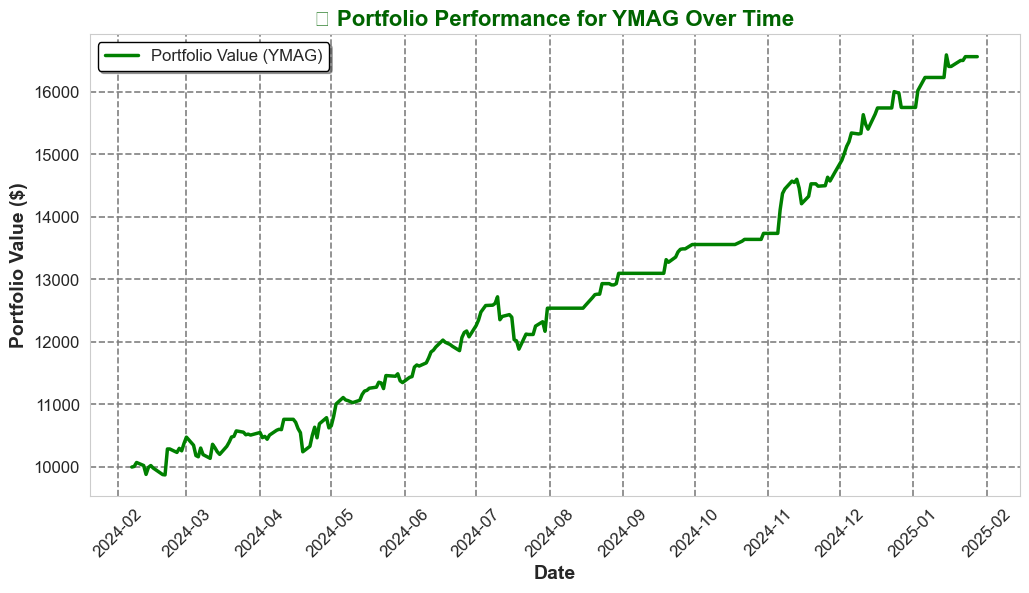

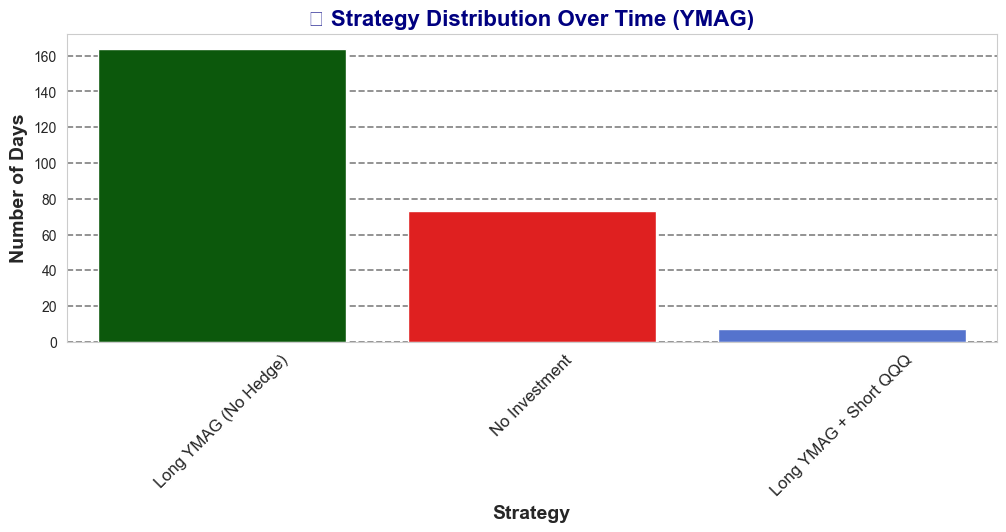

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set Seaborn style for a clean aesthetic
sns.set_style("whitegrid")

# 1️⃣ **Plot Portfolio Performance for YMAG**
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=ymag_df["Date"], y=ymag_df["Portfolio_Value"], color="green", linewidth=2.5, label="Portfolio Value (YMAG)")

# Format X-axis to display months
ax.xaxis.set_major_locator(mdates.MonthLocator())  
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  

# Improve labels and title
plt.xlabel("Date", fontsize=14, fontweight="bold")
plt.ylabel("Portfolio Value ($)", fontsize=14, fontweight="bold")
plt.title("📈 Portfolio Performance for YMAG Over Time", fontsize=16, fontweight="bold", color="darkgreen")

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add THICKER grid lines with color
plt.grid(True, linestyle="--", linewidth=1.2, color="gray")

# Add legend with improved styling
plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=True, edgecolor="black")

# Show plot
plt.show()

# 2️⃣ **Plot Strategy Usage Over Time for YMAG**
plt.figure(figsize=(12, 4))
ax = sns.barplot(x=ymag_df["Strategy"].value_counts().index, y=ymag_df["Strategy"].value_counts().values, palette=["darkgreen", "red", "royalblue"])

# Improve labels and title
plt.xlabel("Strategy", fontsize=14, fontweight="bold")
plt.ylabel("Number of Days", fontsize=14, fontweight="bold")
plt.title("📊 Strategy Distribution Over Time (YMAG)", fontsize=16, fontweight="bold", color="navy")

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add THICKER grid lines with color
plt.grid(axis="y", linestyle="--", linewidth=1.2, color="gray")

# Show plot
plt.show()


##### PERFORMANCE MEASURES OF THE STRATEGY FOR YMAG

In [51]:
# Compute daily returns from portfolio value
ymag_df["Portfolio_Return"] = ymag_df["Portfolio_Value"].pct_change()

# 1️⃣ **Compute Key Performance Metrics**
performance_metrics = {}

# **Total Return (%)**
performance_metrics["Total Return (%)"] = (ymag_df["Portfolio_Value"].iloc[-1] / ymag_df["Portfolio_Value"].iloc[0] - 1) * 100

# **CAGR (Compounded Annual Growth Rate)**
num_days = (ymag_df["Date"].iloc[-1] - ymag_df["Date"].iloc[0]).days
years = num_days / 365
performance_metrics["CAGR (%)"] = ((ymag_df["Portfolio_Value"].iloc[-1] / ymag_df["Portfolio_Value"].iloc[0]) ** (1 / years) - 1) * 100

# **Annualized Volatility (%)**
performance_metrics["Annualized Volatility (%)"] = ymag_df["Portfolio_Return"].std() * np.sqrt(252) * 100

# **Sharpe Ratio** (assuming risk-free rate = 2%)
risk_free_rate = 0.02
sharpe_ratio = (performance_metrics["CAGR (%)"] / 100 - risk_free_rate) / (performance_metrics["Annualized Volatility (%)"] / 100)
performance_metrics["Sharpe Ratio"] = sharpe_ratio

# **Max Drawdown (%) - Corrected**
rolling_max = ymag_df["Portfolio_Value"].cummax()
drawdown = (ymag_df["Portfolio_Value"] / rolling_max) - 1  # This gives drawdowns as decimals

# Convert drawdowns to percentage for display
drawdown_percentage = drawdown * 100

# Correct max drawdown calculation
performance_metrics["Max Drawdown (%)"] = drawdown_percentage.min()  # Already in percentage

# **Calmar Ratio** (CAGR / Absolute Max Drawdown)
max_drawdown_abs = abs(performance_metrics["Max Drawdown (%)"])
performance_metrics["Calmar Ratio"] = performance_metrics["CAGR (%)"] / max_drawdown_abs if max_drawdown_abs != 0 else np.nan

# Convert performance metrics to DataFrame
performance_df = pd.DataFrame(performance_metrics, index=["YMAG Strategy"])


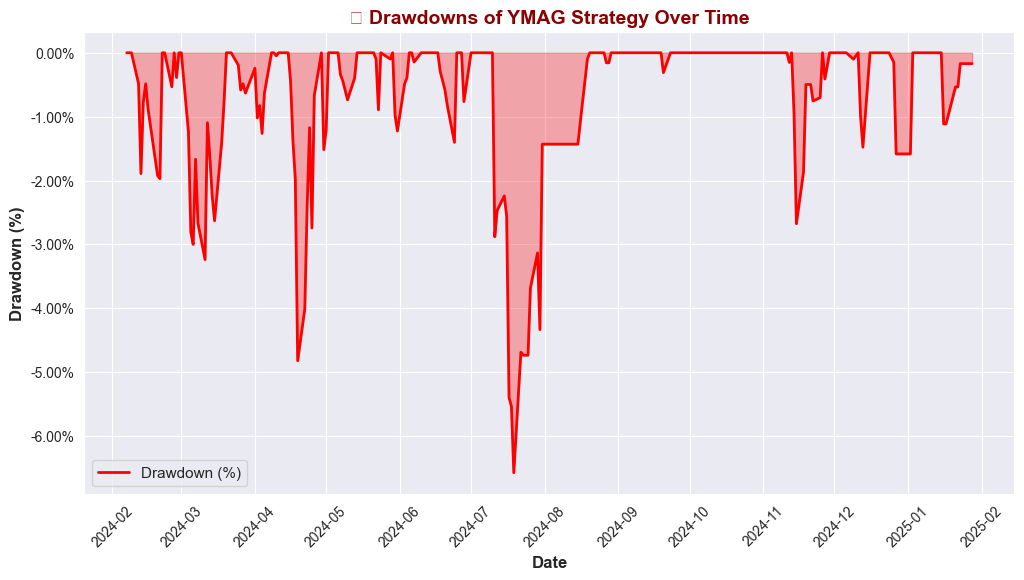

In [52]:
# Set Seaborn theme for better aesthetics
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

# Plot Drawdowns with improved styling
ax = sns.lineplot(x=ymag_df["Date"], y=drawdown_percentage, color="red", linewidth=2, label="Drawdown (%)")

# Fill area under the drawdown curve for better visualization
plt.fill_between(ymag_df["Date"], drawdown_percentage, color="red", alpha=0.3)

# Format Y-axis labels as percentages
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.2f}%"))

# Format X-axis labels to show **one tick per month**
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show ticks at the start of every month
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Format as YYYY-MM (e.g., 2024-03)

# Customize labels and title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Drawdown (%)", fontsize=12, fontweight="bold")
plt.title("📉 Drawdowns of YMAG Strategy Over Time", fontsize=14, fontweight="bold", color="darkred")

# Adjust tick parameters for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add legend
plt.legend(fontsize=11, loc="lower left")

# Show plot
plt.show()

In [53]:
#View the performance metrics DataFrame
performance_df_ymag = performance_df
performance_df_ymag = performance_df_ymag.round(2)
performance_df_ymag

,Total Return (%),CAGR (%),Annualized Volatility (%),Sharpe Ratio,Max Drawdown (%),Calmar Ratio
YMAG Strategy,65.59,67.72,13.78,4.77,-6.58,10.3


In [54]:
# Convert portfolio returns to percentage format of 2 decimal places
ymax_df["Portfolio_Return"] = (ymax_df["Portfolio_Return"] * 100).round(2)
ymag_df["Portfolio_Return"] = (ymag_df["Portfolio_Return"] * 100).round(2)

# Rename the 'Portfolio_Return' column to 'Portfolio_Return (%)'
ymag_df.rename(columns={"Portfolio_Return": "Portfolio_Return (%)"}, inplace=True)
ymax_df.rename(columns={"Portfolio_Return": "Portfolio_Return (%)"}, inplace=True)

# Export the data to excel
# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter('Prices_and_stats_df.xlsx', engine='xlsxwriter') as writer:
    # Write Prices_and_stats_df to the first sheet
    Prices_and_stats_df.to_excel(writer, sheet_name='Sheet1', index=False)
    
    # Write ymax_df to the second sheet
    ymax_df.to_excel(writer, sheet_name='Ymax Trading Results', index=False)
    
    # Write ymag_df to the third sheet
    ymag_df.to_excel(writer, sheet_name='YMAG Trading Results', index=False)
    
    # Export YMAX Performance Metrics to the 3rd sheet
    performance_df_ymax.to_excel(writer, sheet_name="YMAX Performance", index=True)

    # Export YMAG Performance Metrics to the 4th sheet
    performance_df_ymag.to_excel(writer, sheet_name="YMAG Performance", index=True)
    
print(f"✅ Performance DataFrames successfully saved to 'Prices_and_stats_df.xlsx'")

✅ Performance DataFrames successfully saved to 'Prices_and_stats_df.xlsx'


# 🚀 Handling Different Trading Strategies

Each trading strategy affects the **portfolio value** differently. We now handle **three scenarios** based on the chosen strategy for each day.

---

## 🟢 1️⃣ Case 1: Long YMAG (No Hedge)
### **Condition:**
- If **VIX < 20** and **VVIX < 100**, we go **fully long on YMAG (without hedging QQQ).**

### **Portfolio Update Formula:**
$$
\text{Portfolio Value}_t = \text{Shares Held} \times (\text{YMAG Price}_t + \text{YMAG Dividend}_t)
$$

Where:
- **Shares Held** = Number of shares purchased using the previous day's portfolio value:
  $$
  \text{Shares Held} = \frac{\text{Portfolio Value}_{t-1}}{\text{YMAG Price}_{t-1}}
  $$
- **YMAG Price** = The price of YMAG at time $t$.
- **YMAG Dividend** = Dividend per share distributed at time $t$.

### ✅ Example Calculation:
- **Yesterday’s Portfolio Value:** $10,000  
- **YMAG Price Yesterday:** $20.00  
- **Shares Purchased:** $10,000 / $20.00 = **500 shares**  
- **Today’s YMAG Price:** $20.50  
- **Dividend Today:** $0.50 per share  

$$
\text{Portfolio Value}_t = 500 \times (20.50 + 0.50) = 500 \times 21.00 = 10,500
$$

---

## 🔵 2️⃣ Case 2: Long YMAG + Short QQQ (Hedged)
### **Condition:**
- If **VIX ≥ 20** or **VVIX ≥ 100**, we go **long YMAG and hedge by shorting QQQ**.
- Shorting QQQ means that **when QQQ goes up, we lose money**, and **when QQQ goes down, we gain money**.

### **Portfolio Update Formula:**
$$
\text{Portfolio Value}_t = (\text{Shares Held} \times (\text{YMAG Price}_t + \text{YMAG Dividend}_t)) - \text{QQQ Hedge PnL}_t
$$

Where:
- **Shares Held** = Same as in Case 1:
  $$
  \text{Shares Held} = \frac{\text{Portfolio Value}_{t-1}}{\text{YMAG Price}_{t-1}}
  $$
- **QQQ Hedge Profit/Loss (PnL):**
  $$
  \text{QQQ Hedge PnL}_t = \text{QQQ Shares Shorted} \times (\text{QQQ Price}_{t-1} - \text{QQQ Price}_t)
  $$

- **QQQ Shares Shorted:** (Calculated only when the hedge is first applied)
  $$
  \text{QQQ Shares Shorted} = \frac{\text{Portfolio Value}_{t-1}}{\text{QQQ Price}_{t-1}}
  $$

### ✅ Example Calculation:
- **Yesterday’s Portfolio Value:** $10,000  
- **YMAG Price Yesterday:** $20.00  
- **Shares Purchased:** $10,000 / $20.00 = **500 shares**  
- **Today’s YMAG Price:** $20.60  
- **Dividend Today:** $0.50 per share  
- **QQQ Price Yesterday:** $400 → **Today:** $405  

#### **Step 1: Calculate Hedge PnL**
- **QQQ Shares Shorted:**
  $$
  \frac{10,000}{400} = 25 \text{ shares}
  $$
- **QQQ Hedge Loss:**
  $$
  25 \times (400 - 405) = 25 \times (-5) = -125
  $$

#### **Step 2: Update Portfolio Value**
$$
\text{Portfolio Value}_t = (500 \times (20.60 + 0.50)) - (-125)
$$

$$
= (500 \times 21.10) - (-125) = 10,550 + 125 = 10,675
$$

---

## 🔴 3️⃣ Case 3: No Investment (Stay in Cash)
### **Condition:**
- If **VIX ≥ 20 or VVIX ≥ 100** and **correlation of YMAG with VIX or VVIX < -0.3**, we **do not invest**.
- The **portfolio remains unchanged**.

### **Portfolio Update Formula:**
$$
\text{Portfolio Value}_t = \text{Portfolio Value}_{t-1}
$$

### ✅ Example Calculation:
- **Yesterday’s Portfolio:** $10,000  
- **Today’s Strategy:** `"No Investment"`  
- **Portfolio Value Stays the Same:**  
  $$
  \text{Portfolio Value}_t = 10,000
  $$

---

## 📌 **Summary Table**

| **Strategy**                     | **Formula Used** |
|-----------------------------------|------------------|
| **Long YMAG (No Hedge)**          | $ \text{Portfolio Value}_t = \text{Shares Held} \times (\text{YMAG Price}_t + \text{YMAG Dividend}_t) $ |
| **Long YMAG + Short QQQ**         | $ \text{Portfolio Value}_t = (\text{Shares Held} \times (\text{YMAG Price}_t + \text{YMAG Dividend}_t)) - \text{QQQ Hedge PnL}_t $ |
| **No Investment (Stay in Cash)**  | $ \text{Portfolio Value}_t = \text{Portfolio Value}_{t-1} $ |

This breakdown ensures the correct handling of **portfolio value updates under each trading strategy**, including the **correct hedge profit/loss for QQQ shorting**. 🚀
